# UNIVERSIDAD NACIONAL DE CÓRDOBA#
## Fa.M.A.F – Observatorio Astronómico ##
### Licenciatura en Astronomía ###
### Tapia Martina ###
### Astrometría 2020 ###
## Práctico N° 2##

## Actividad 5 ##

### Introducción  ###


Siguiendo con el método de Prueba- Hipótesis, en la estadística inferencial aparecen varios problemas que es muy útil saber resolver. Uno de estos problemas es poder distinguir cuando dos distribuciones surgen de la misma función distribución o provienen de funciones de distribución diferentes. Determinar que dos distribuciones son diferentes o mostrar que ellas son consistentes es una tarea que surge constantemente en muchas áreas de la investigación. Este problema además puede subdividirse en dos casos: cuando los datos provienen de variables discretas o de variables continuas. A continación, se describirá el método **Chi-cuadrado** para tratar datos bineados de variable discreta. Notar que, para analizar datos provenientes de variables aleatorias continuas como función de una sola variable se usa el método de Kolmogorov-Smirnov. 

El **objetivo** de ésta actividad es diseñar, impementar y verificar una función que calcule el test de **chi-cuadrado** para comparar un histograma con un modelo dado por una distribución *Binomial*, f(x) ∼ B(n = 10, p = 0.4). Para ello, se realizarán varios pasos que serán detallados luego. 


### Test de chi–cuadrado ###

El método Chi-cuadrado, usualmente denominado "de Pearson" o de "asociación”, es considerado como una prueba no paramétrica que mide la discrepancia entre una distribución observada y otra teórica, indicando en qué medida las diferencias existentes entre ambas, de haberlas, se deben al azar en la Prueba- Hipótesis. En particular, el método de Chi-cuadrado compara histogramas con distribuciones de probabilidad discretas. El método también funciona para funciones de distribución discretizadas, donde las probabilidades se obtienen integrando las funciones distribución sobre los diferentes bines. El método tiene dos variantes:  

- Para comparar un histograma con una función de probabilidad acumulada discretizada. La hipótesis nula $H_{0}$ es la muestra sigue la distribución de probabilidades dada.
- Para comparar dos histogramas obtenidos de dos muestras diferentes. La hipótesis nula $H_{0}$ es las dos muestras siguen la misma distribución.  

En el caso de la actividad a realizar, se prenseta el primer caso. Luego, el estadístico de prueba chi- cuadrado es:  

$$ \chi^2 = \sum_{i=1} \frac{(frecuencia_{observada,i}-frecuancia_{teórica,i})^2}{frecuencia_{teorica}} $$    

Notar que, cuanto mayor sea el valor de $ \chi^2$, menos verosímil es que la hipótesis sea correcta. De la misma forma, cuanto más se aproxima a cero el valor de chi-cuadrado, más ajustadas están ambas distribuciones.  
Los grados de libertad $\nu$ vienen dados por $ \nu = N − 1 $ donde N es el número de bines.  

Las tablas de la distribución acumulada de la función distribución relacionada con este estadístico es la que se usa para hacer las estimas necesarias en el método chi-cuadrado. En consecuencia, se acepta $H_{0}$ cuando $ \chi^2 < \chi^2_{(1−\alpha,\nu)}$ En caso contrario se rechaza.  
Observar que $\alpha$  representa el nivel de significación estadística elegido.  
 

- Lo primero que se realizará es simular 100 observaciones de la variable aleatoria (V.A). binomial y se calcularán las frecuencias de cada valor.

In [1]:
#Primero se importan las librerías necesarias para trabajar
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import seaborn as sns          
sns.set()         
import scipy.stats as st
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=True)

In [2]:
#Hago un experimento de Bernoulli

def sorteo(n,p):
    e =0
    E = []
    for i in range(n):
        x = random.random()
        if 0 < x < p:
            e = e + 1
            E.append(e)
        elif p < x < 1:
            None
    return(len(E))

    

In [3]:
#Se verifica que la función realizada funcione
sorteo(100,0.4)

38

In [4]:
#Se define una función que realiza el n_obs sorteos de una v.a Binomial

def Sorteo_Binomial(n_obs, n, p):
    S = []
    for j in range(n_obs):
        sb = sorteo(n,p)
        S.append(sb)
        
    return(S)
    

In [5]:
#Sorteo_Binomial(100,10,0.4)

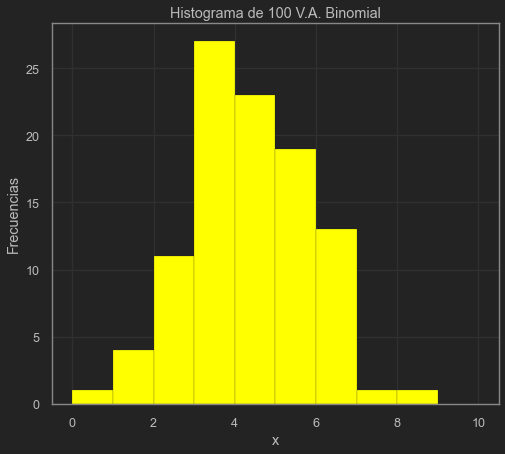

In [6]:
#Luego, se observan las frecuencias a través de un Histograma

h =plt.hist(Sorteo_Binomial(100,10,0.4), bins=np.arange(0.0, 10.2, 1), color='yellow')

plt.title('Histograma de 100 V.A. Binomial')
plt.xlabel('x')
plt.ylabel('Frecuencias')
plt.show()

In [7]:
fre = h[0]
print('Las frecuencias de cada x son:', fre)

Las frecuencias de cada x son: [ 1.  4. 11. 27. 23. 19. 13.  1.  1.  0.]


- Lo que se realizará a continuación es calcular el estadístico $\chi^2$ a partir del modelo y de los datos simulados.  
Antes del estadístico, se construye la distribución de probabilidad Binomial teórica usando la función 'st.binom.pmf'. 

In [8]:
f_binomial_teo = st.binom.pmf(k=np.arange(10), n=10, p=0.4)  

Notar que las frecuencias de la distribución Binomial teórica son relativas y para comparar con la distribución empírica creada anteriormente, se necesita que ambas distribuciones sean graficadas con las mismas frecuencias. Se multiplicarán por 100 las frecuencias relativas para así obtener frecuencias absolutas.

In [9]:
fb = f_binomial_teo * 100

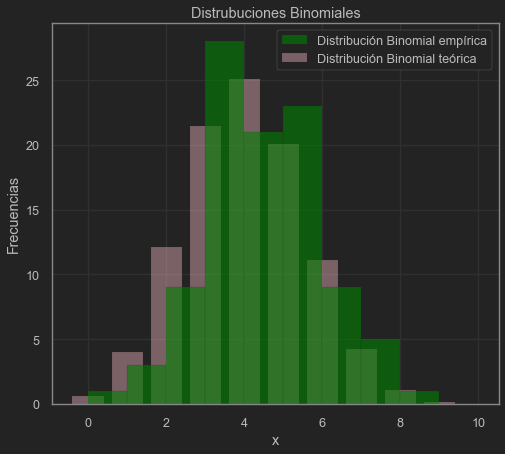

In [10]:
#Se grafican ambas distribuciones 

plt.bar(np.arange(10),fb,  color='pink', alpha=0.4, label='Distribución Binomial teórica')

plt.hist(Sorteo_Binomial(100,10,0.4), bins=np.arange(0.0, 10.2, 1),color='green', label='Distribución Binomial empírica', alpha=0.6)
plt.title('Distrubuciones Binomiales')
plt.xlabel('x')
plt.ylabel('Frecuencias')
plt.legend(loc='upper right')
plt.show()

- Luego de tener las distribuciones a comparar, se calcula el estimador $\chi^2$ usando la fórmula presentada en la introducción. En la expresión del estimador, $f_{observada,i}$ indica la frecuencia empírica observada, calculada del primer histograma y $f_{teórico,i}$ indica la frecuencia de la distribución teórica. Notar que en ambos casos se trabaja con las frecuencias relativas. Luego, se define una función que calcule el estimador.

In [11]:
fobs = fre / 100
fteo = f_binomial_teo

In [12]:
def chi_cuadrado():
    chi=0
    chi1 = []
    for i in range(len(fobs)):
        a = (fobs[i] - fteo[i]) **2
        b = fteo[i]
        chi = a / b
        chi1.append(chi)
    chi2 = sum(chi1)
    return(chi2)

In [13]:
chi = chi_cuadrado()
print('El valor del estimador es:', chi)

El valor del estimador es: 0.04945393903438376


- Una vez obtenido el estimador $\chi^2$ se realizará una prueba de hipótesis completa para decidir si los datos están en acuerdo con el modelo.

Primero se plantean las hipótesis;

$ H_{0}: $ La muestra de la distribución empírica creada sigue la distribución Binomial teórica.  

$ H_{a}: $ La muestra de la distribución empírica creada **no** sigue la distribución Binomial teórica.  

Luego, se determina el Nivel de significación o confianza para realizar la prueba: $\alpha =$ 0,05  

- Zona de aceptación: son todos los valores de $\chi^2 < \chi_c $
- Zona de rechazo: son todos los valores de $\chi^2 > \chi_c $


Se calculan los grados de libertad:

$$gl= Num\ de\ variables (x) - Num\ de\ restricciones$$
donde número de x es: 0,1,2...9 =10 y el número de restricciones es 1. Luego:

$$gl=9$$
Además:

$$1-\alpha = 0.95$$
Buscando en las tablas de probabilidad acumulada de la distribución de probabilidad de $\chi^2$, para gl=9 y $\alpha=0.05$, se encuentra que el valor crítico para chi-cuadrado es:

$$\chi_{(1-\alpha);gl}^2 = \chi_{c}^2 = 16.92$$  

Luego, el valor de $\chi^2$  obtenido es menor a 16.92, el estadístico de prueba cae en la zona de aceptación, por lo que se acepta la hipótesis nula. La distribución empírica creada sigue la distribución Binomial teórica.

- A continuación, se calculará el **valor-p** de la prueba.

$$p-value= 1 - P(\chi^2 < \chi_{0}^2) = = 1 - F(\chi_{0}^2)$$ 
donde $\chi^2$ la variable aleatoria estadístico chi-cuadrado y $\chi_{0}^2$ el valor calculado, P la función probabilidad de la distribución del estadístico de prueba y F la función acumulada.

Para calcular la función acumulada de la distribución de $\chi^2$ se usa la función 'st.chi2.cdf' la cual recibe como primer argumento el valor de $\chi_{0}^2$ y como segundo los grados de libertad


In [14]:
def p_value(chi, gl):
    acum = st.chi2.cdf(chi, gl) 
    p = 1 - acum 
    return p

In [15]:
print('El valor-p de la prueba es:', p_value(chi,9))

El valor-p de la prueba es: 0.9999999988994013


Se puede ver que el valor p obtenido es mayor al nivel de significancia 0.05, lo cual no permite rechazar la hipótesis nula, coincidiendo con lo que se obtuvo en la prueba de Hipótesis.

- En el siguiente apartado se simularán muestras de 100 observaciones de una v.a. N(µ, σ), con σ=2.5 y µ que varíe entre 2 y 7.  Se estudiará cómo varía el valor p determinando si en algún rango de µ se puede “confundir” el modelo.  Se comienza definiendo una función que genere muestras de 100 variables aleatorias normales con $\sigma=2.5$ y $\mu$ como parámetro libre al cual se le pueda indicar cualquier valor.

In [16]:
def va_normal(n,u, sigma =2.5):
    va = []
    for i in range(n):      
        x = st.norm.rvs(loc=u, scale=sigma) 
        va.append(x)       
    return va

In [17]:
#va_normal(100, 2)

Como se mencionó se consideran los valores de $\mu$ discretos entre 2 y 7. A continuación se grafican junto con la distribución teórica binomial en el mismo grafico ya que es con la que se quiere comparar. 

In [18]:
f_binomial_teo3 =  st.binom.pmf(k=np.arange(10), n=10, p=0.4)  

In [19]:
fb3 = f_binomial_teo3 * 100

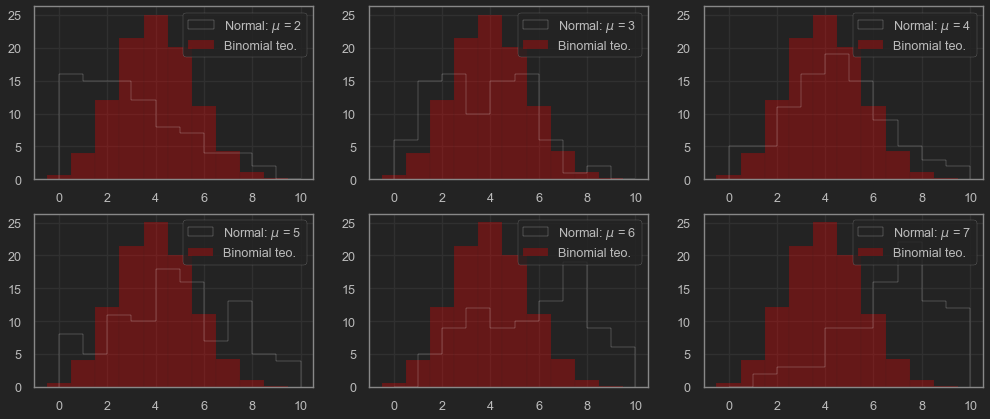

In [20]:
frecuencias=[]
plt.figure(figsize=(17,7))

for i in [1,2,3,4,5,6]:  
    plt.subplot(2,3,i)   
    plt.bar(np.arange(10), fb3, width=1, color='red', alpha=0.3, label='Binomial teo.')
    h=plt.hist(va_normal(100,i+1), bins=np.arange(0.0,10.2,1), histtype='step', ec='white', label='Normal: $\mu$ = '+ str(i+1))
    plt.legend(loc='best')
    frecuencias.append(h[0]) 

In [21]:
#Notar que la lista 'frecuencias' contiene las listas de frecuencias para cada valor de u
frecuencias

[array([16., 15., 15., 12.,  8.,  7.,  4.,  4.,  2.,  0.]),
 array([ 6., 15., 16., 10., 15., 16.,  6.,  1.,  2.,  0.]),
 array([ 5.,  5., 11., 16., 19., 15.,  9.,  5.,  3.,  2.]),
 array([ 8.,  5., 11., 10., 18., 16.,  7., 13.,  5.,  4.]),
 array([ 0.,  5.,  9., 12.,  9., 10., 13., 19.,  9.,  6.]),
 array([ 0.,  2.,  3.,  3.,  9.,  9., 16., 22., 13., 12.])]

Se calcula los $\chi^2$ para cada $\mu$ usando la función "chi2(f)" donde f es una lista con las frecuencias de la distribución a comparar, las cuales se encuentran guardadas en la lista 'frecuencias'. Se realiza para cada distribución normal aleatoria graficada.


In [22]:
def chi_cuadrado2(f,teo):
    chi2=0
    for j in range(len(f)):
        if teo[j] != 0:
            chi2 = chi2 + (((f[j]-teo[j])**2)/teo[j])
        else:
            continue
    return chi2

In [23]:
#Frecuencias para el caso de u = 2
frecuencias[0]

array([16., 15., 15., 12.,  8.,  7.,  4.,  4.,  2.,  0.])

In [24]:
#Se calcula el valor de chi cuadrado para cada valor de u 

chis_cuadrado = []
for k in [0,1,2,3,4,5]:
    chis = chi_cuadrado2(frecuencias[k], fb3)
    print('Para u=',k+2, 'se tiene chi2=', chis)
    chis_cuadrado.append(chis)

Para u= 2 se tiene chi2= 452.45049114337525
Para u= 3 se tiene chi2= 96.12443271255468
Para u= 4 se tiene chi2= 62.1169651279382
Para u= 5 se tiene chi2= 227.83170261073454
Para u= 6 se tiene chi2= 349.1426423830791
Para u= 7 se tiene chi2= 1143.0536734344355


En este caso: gl= 10-1=9 y $\alpha$=0.05. Luego, $\chi_{c}^2$=16.92.

Como todos los valores obtenidos son mayores al $\chi_{c}^2$, se rechaza la hipótesis nula para todos los casos.

In [25]:
for k in range(len(chis_cuadrado)):
    p = p_value(chis_cuadrado[k],9)
    print('Para u=',k+2, 'se tiene valor-p=', p)

Para u= 2 se tiene valor-p= 0.0
Para u= 3 se tiene valor-p= 1.1102230246251565e-16
Para u= 4 se tiene valor-p= 5.230361699304353e-10
Para u= 5 se tiene valor-p= 0.0
Para u= 6 se tiene valor-p= 0.0
Para u= 7 se tiene valor-p= 0.0


Se obtiene que todos los valores de p obtenidos son menores a 0.05 (valor de alpha), lo que significa el rechazo de la hipótesis nula. Coincidiendo éste resultado con el análisis del estimador chicuadrado. 

Luego, al comparar la distribuciones se ve que la muestra de la distribución empírica normal creada, no sigue la distribución Binomial teórica. Éste resultado no es el esperado ya se cree posible que la distribución binomial coincida con alguna distribución normal, sin embargo, no es lo que se obtiene al realizar la prueba de hipótesis y tampoco se detectó algun error en el procedimiento seguido.

- A continuación, se realizará un procedimeinto similar al anterior pero en lugar de sortear 100 randoms hay que sortear 1000.

In [26]:
f_binomial_teo4 =  st.binom.pmf(k=np.arange(10), n=10, p=0.4)  

In [27]:
f_binomial_teo5 = f_binomial_teo4 *1000

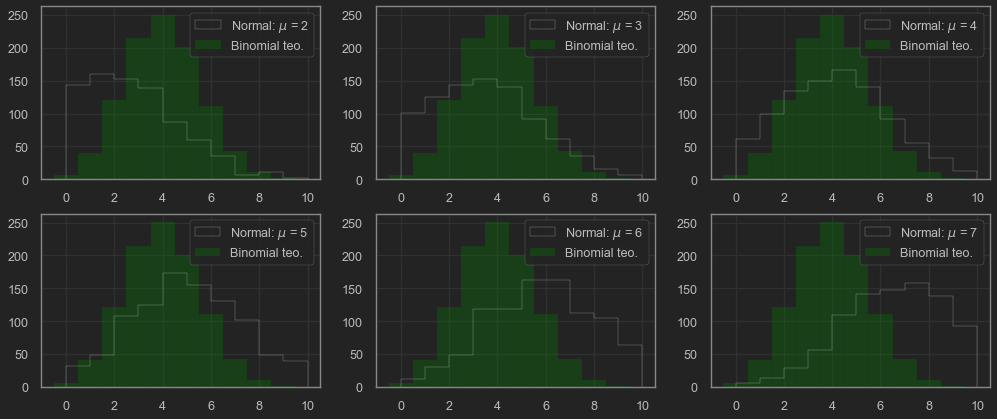

In [31]:
frecuencias2=[]
plt.figure(figsize=(17,7))

for i in [1,2,3,4,5,6]:  
    plt.subplot(2,3,i)   
    plt.bar(np.arange(10), f_binomial_teo5, width=1, color='green', alpha=0.3, label='Binomial teo.')
    h2=plt.hist(va_normal(1000,i+1), bins=np.arange(0.0,10.2,1), histtype='step', ec='white', label='Normal: $\mu$ = '+ str(i+1))
    plt.legend(loc='best')
    frecuencias2.append(h2[0]) 

In [32]:
frecuencias2

[array([144., 160., 153., 139.,  87.,  60.,  35.,   7.,  11.,   2.]),
 array([101., 125., 144., 152., 141.,  91.,  61.,  35.,  15.,   7.]),
 array([ 62., 100., 134., 150., 167., 140.,  91.,  55.,  32.,  13.]),
 array([ 32.,  48., 108., 125., 173., 155., 130., 101.,  48.,  39.]),
 array([ 12.,  30.,  48., 118., 118., 163., 162., 113., 104.,  63.]),
 array([  6.,  14.,  29.,  56., 109., 141., 148., 158., 139.,  93.])]

In [33]:
#Se calcula el valor de chi cuadrado para cada valor de u 

chis_cuadrado2 = []
for k in [0,1,2,3,4,5]:
    chis2 = chi_cuadrado2(frecuencias2[k], f_binomial_teo5)
    print('Para u=',k+2, 'se tiene chi2=', chis2)
    chis_cuadrado2.append(chis2)

Para u= 2 se tiene chi2= 3825.956647902739
Para u= 3 se tiene chi2= 1844.6036021393047
Para u= 4 se tiene chi2= 807.1127630566886
Para u= 5 se tiene chi2= 1292.4334069485712
Para u= 6 se tiene chi2= 3534.0581894361717
Para u= 7 se tiene chi2= 7495.760918519719


In [34]:
for k in range(len(chis_cuadrado2)):
    p = p_value(chis_cuadrado2[k],9)
    print('Para u=',k+2, 'se tiene valor-p=', p)

Para u= 2 se tiene valor-p= 0.0
Para u= 3 se tiene valor-p= 0.0
Para u= 4 se tiene valor-p= 0.0
Para u= 5 se tiene valor-p= 0.0
Para u= 6 se tiene valor-p= 0.0
Para u= 7 se tiene valor-p= 0.0


Nuevamente, se obtiene que los valores del estimador chi cuadrado encontrados son mayores al valor crítico y por lo tanto se rechaza la hipótesis nula. Luego, al analizar los valores de p, todos son menores al nivel de significancia 0.05 y re confirma el rechazo de $H_{0}$. 

No se logró identificar el por qué de las diferencias entre los resultados encontrados en los primeros análisis y en los últimos. 